We have created a cython package 

In [1]:
import time
import tracemalloc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import dual_autodiff.dual as df
from dual_autodiff.dual_autodiff_tools import apply_function_to_list 
import dual_autodiff_x.dual as dfx
from dual_autodiff_x.dual_autodiff_tools import apply_function_to_list as apply_function_to_list_x

In [2]:
# Range of input sizes
input_sizes = [100, 500, 1000, 5000, 10000, 50000, 100000]
operations = ["Addition", "Multiplication", "Cosine", "Polynomial"]

# Data storage
results = {
    "Input Size": [],
    "Operation": [],
    "Implementation": [],
    "Execution Time (ms)": [],
    "Memory Usage (KB)": [],
}

In [3]:
%load_ext Cython
for size in input_sizes:
    # Generate random dual numbers
    np.random.seed(2107)
    reals = np.random.rand(size)
    duals = np.random.rand(size)

    python_duals = [df.Dual(real, dual) for real, dual in zip(reals, duals)]
    cython_duals = [dfx.Dual(real, dual) for real, dual in zip(reals, duals)]

    for operation in operations:
        # Measure execution time and memory for Python implementation
        tracemalloc.start()
        start_time_python = time.process_time()

        if operation == "Addition":
            _ = [x + y for x, y in zip(python_duals, python_duals)]
        elif operation == "Multiplication":
            _ = [x * y for x, y in zip(python_duals, python_duals)]
        elif operation == "Division":
            _ = [x / y for x, y in zip(python_duals, python_duals)]
        elif operation == "Cosine":
            _ = [x.sin() for x in python_duals]
        elif operation == "Polynomial":
            _ = [x.poly(coeff=[1,1,1]) for x in python_duals]
        

        python_time = (time.process_time() - start_time_python) * 1000  # Convert to ms
        python_memory = tracemalloc.get_tracemalloc_memory()
        tracemalloc.stop()

        # Store Python results
        results["Input Size"].append(size)
        results["Operation"].append(operation)
        results["Implementation"].append("Python")
        results["Execution Time (ms)"].append(python_time)
        results["Memory Usage (KB)"].append(python_memory / 1024)

        # Measure execution time and memory for Cython implementation
        tracemalloc.start()
        start_time_cython = time.process_time()

        if operation == "Addition":
            _ = [x + y for x, y in zip(cython_duals, cython_duals)]
        elif operation == "Multiplication":
            _ = [x * y for x, y in zip(cython_duals, cython_duals)]
        elif operation == "Division":
            _ = [x / y for x, y in zip(cython_duals, cython_duals)]
        elif operation == "Cosine":
            _ = [x.sin() for x in cython_duals]
        elif operation == "Polynomial":
            _ = [x.poly(coeff=[1,1,1]) for x in cython_duals]


        cython_time = (time.process_time() - start_time_cython) * 1000  # Convert to ms
        cython_memory = tracemalloc.get_tracemalloc_memory()
        tracemalloc.stop()

        # Store Cython results
        results["Input Size"].append(size)
        results["Operation"].append(operation)
        results["Implementation"].append("Cython")
        results["Execution Time (ms)"].append(cython_time)
        results["Memory Usage (KB)"].append(cython_memory / 1024)

# Convert results to a DataFrame
df_results = pd.DataFrame(results)

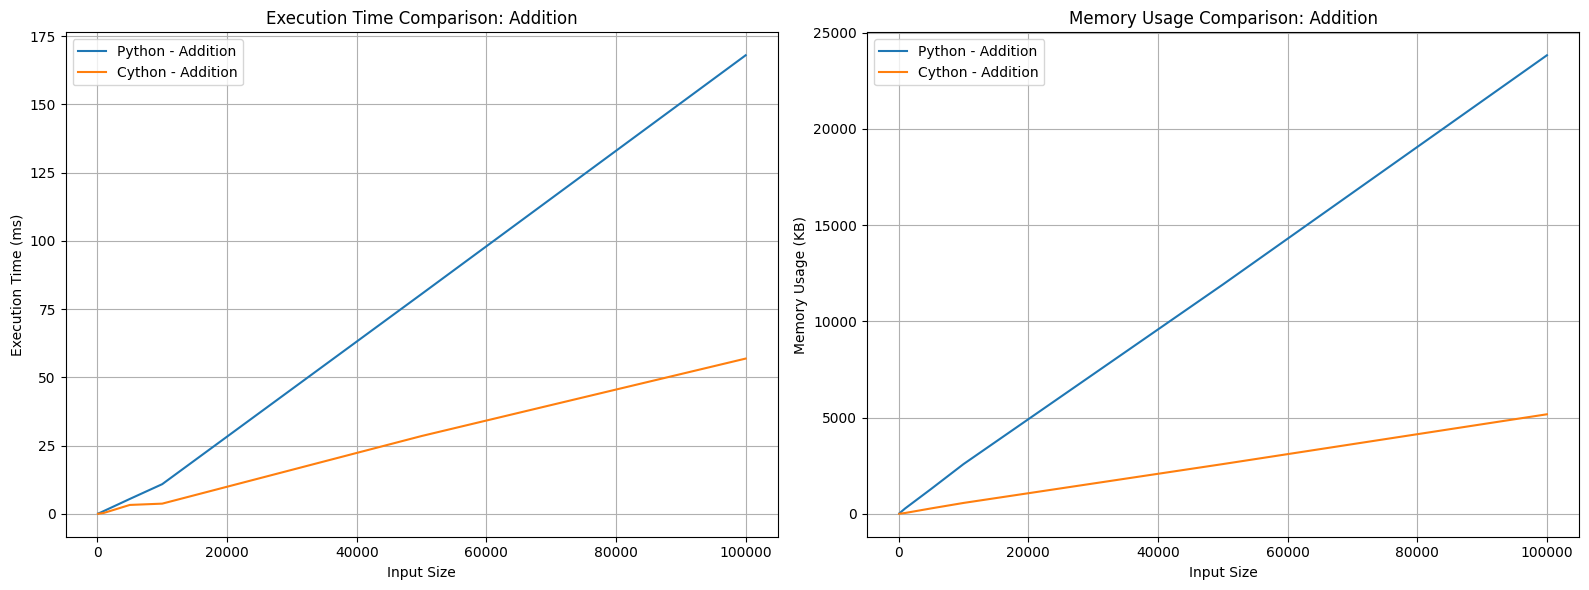

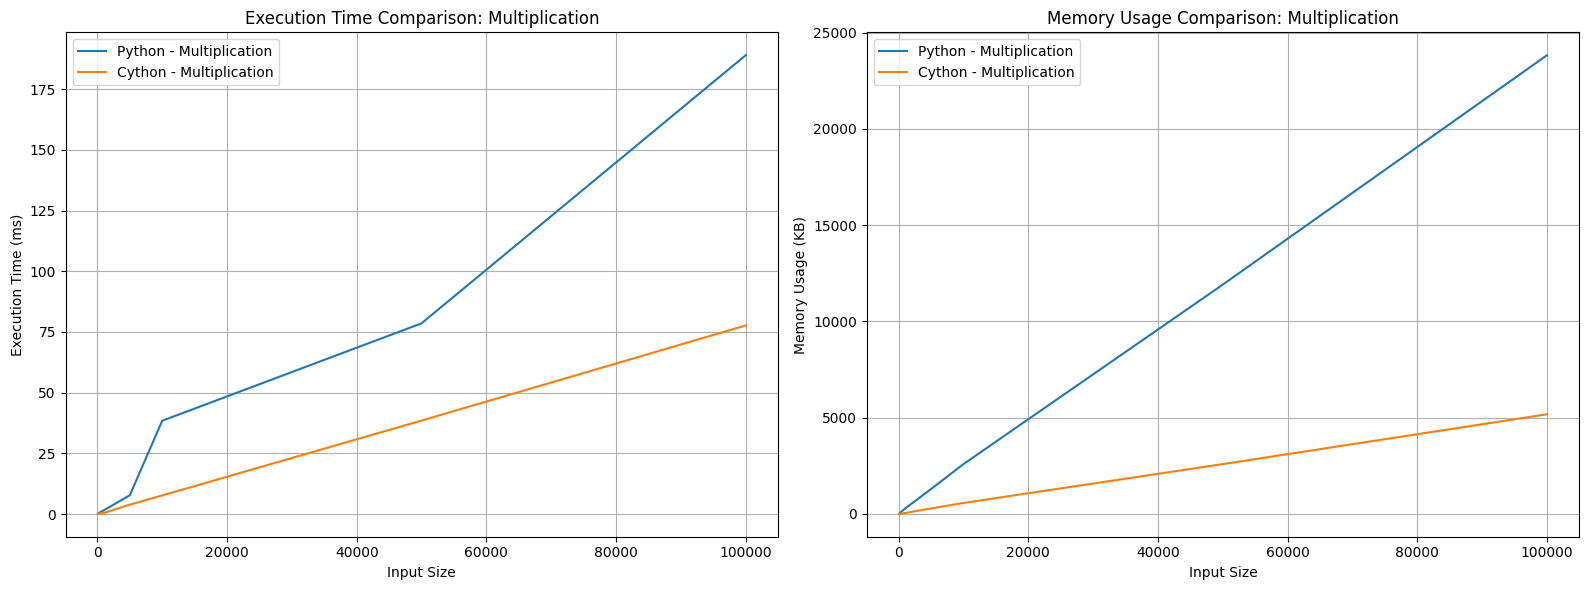

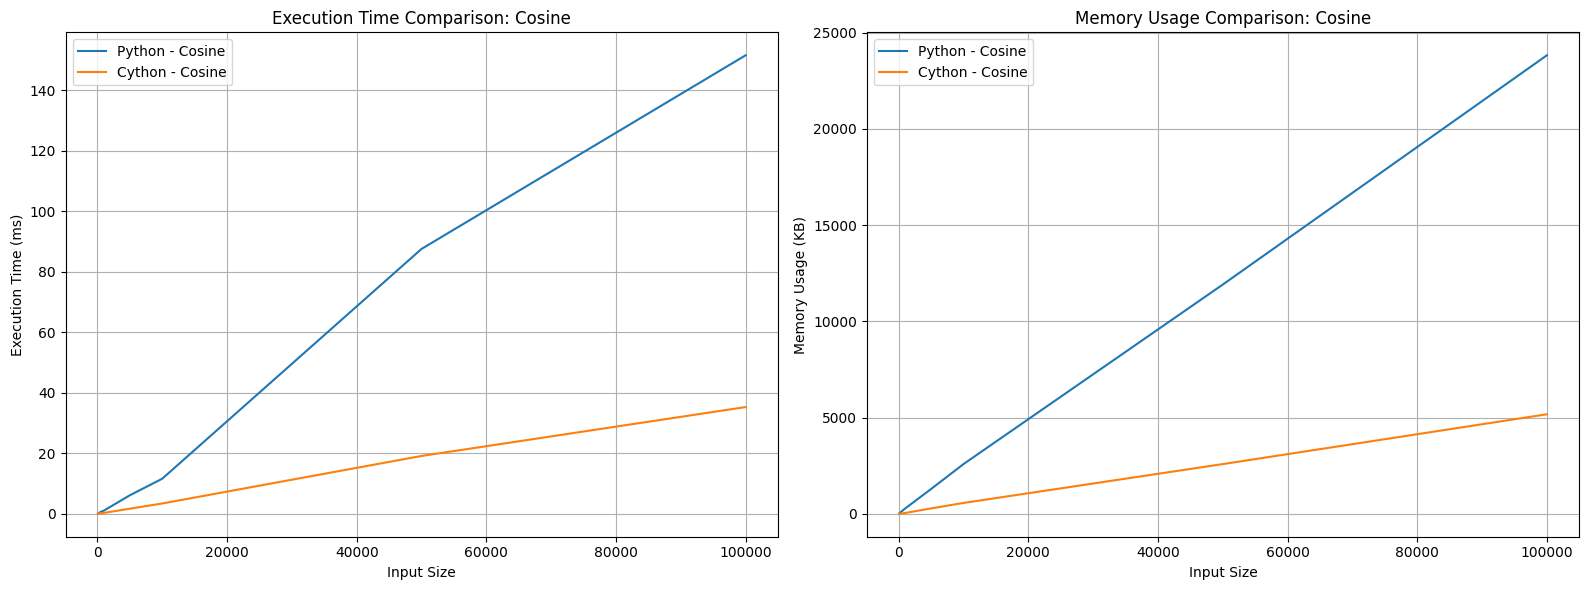

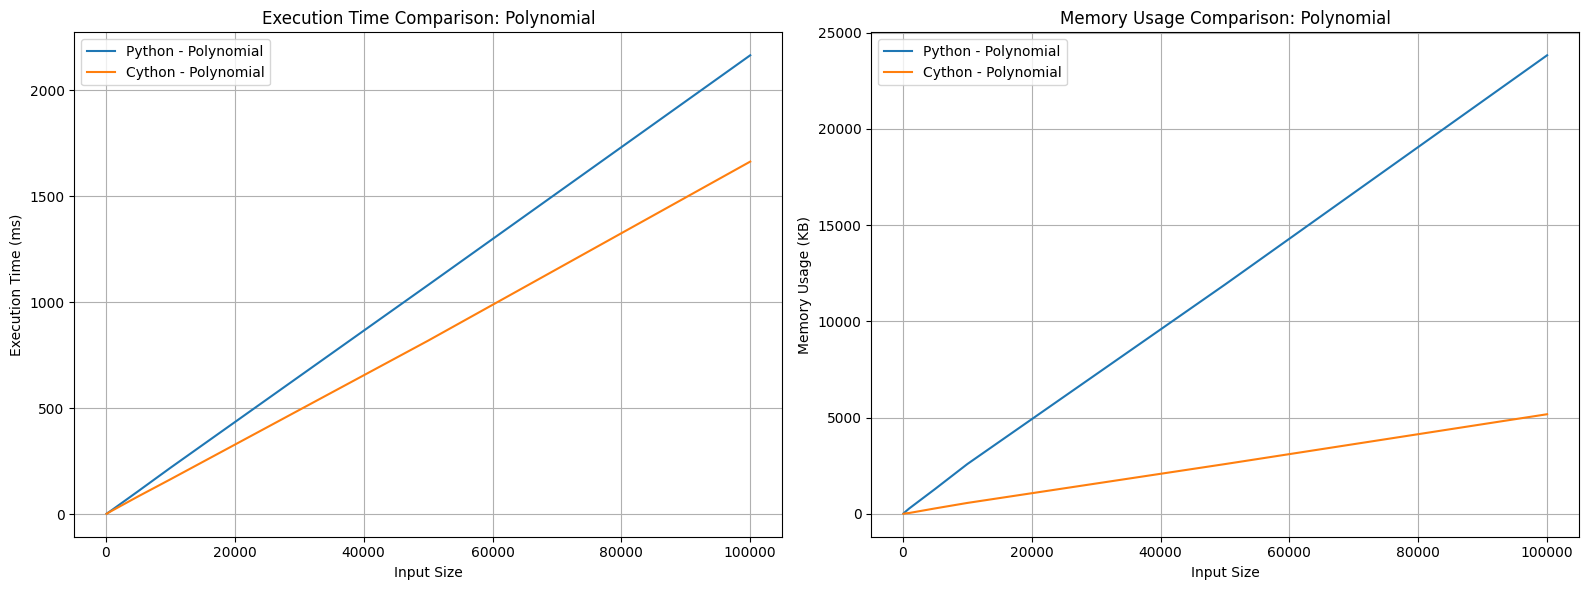

In [4]:
for operation in operations:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # Create a figure with two subplots

    # Plot Execution Time on the left
    for impl in ["Python", "Cython"]:
        subset = df_results[(df_results["Operation"] == operation) & (df_results["Implementation"] == impl)]
        axes[0].plot(subset["Input Size"], subset["Execution Time (ms)"], label=f"{impl} - {operation}")

    axes[0].set_title(f"Execution Time Comparison: {operation}")
    axes[0].set_xlabel("Input Size")
    axes[0].set_ylabel("Execution Time (ms)")
    axes[0].legend()
    axes[0].grid()

    # Plot Memory Usage on the right
    for impl in ["Python", "Cython"]:
        subset = df_results[(df_results["Operation"] == operation) & (df_results["Implementation"] == impl)]
        axes[1].plot(subset["Input Size"], subset["Memory Usage (KB)"], label=f"{impl} - {operation}")

    axes[1].set_title(f"Memory Usage Comparison: {operation}")
    axes[1].set_xlabel("Input Size")
    axes[1].set_ylabel("Memory Usage (KB)")
    axes[1].legend()
    axes[1].grid()

    # Adjust layout and show the figure
    plt.tight_layout()
    plt.show()

This graphs reveal a significant performance difference in both execution time and memory usage for the Cython package. In the
Python programming language, each iteration of a loop is associated with a considerable amount of overhead. This includes operations such as dynamic type checking, reference counting, and function calls for accessing and operating on array elements.
In contrast, Cython employs static typing and compiles loops and operations into lowlevel machine code, thereby circumventing the overhead associated with the Pythoninterpreter.

The findings illustrate that the utilisation of Cython for computationally demanding operations can result in significant enhancements in efficiency, thereby establishing it as a highly effective instrument for performance-critical applications.